In [3]:
%pip install pandas matplotlib seaborn

  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

   ---------------------------------------- 0/3 [pandas]
   ---------------------------------------- 0/3 [pandas]
   ---------------------------------------- 0/3 [pandas]
   ---------------------------------------- 0/3 [pandas]
   ---------------------------------------- 0/3 [pandas]
   ---------------------------------------- 0/3 [pandas]
   ---------------------------------------- 0/3 [pandas]
   ---------------------------------------- 0/3 [pandas]
   ---------------------------------------- 0/3 [pandas]
   ---------------------------------------- 0/3 [pandas]
   --------------------------------

# Imports

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Set visualization styles

In [5]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Load Data

In [6]:
data_path = "../data/housing.csv"  # Adjust if needed
df = pd.read_csv(data_path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Basic Info and Summary Statistics

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Missing Values

In [9]:
missing = df.isnull().sum()
missing[missing > 0]

total_bedrooms    207
dtype: int64

# Correlation Matrix

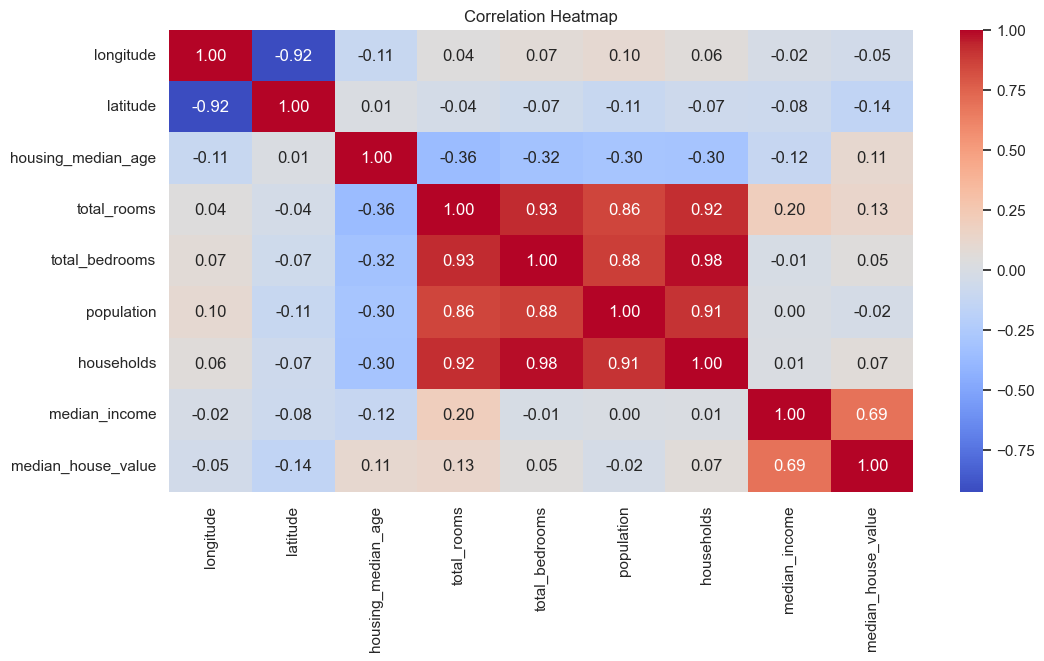

In [10]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Target Distribution

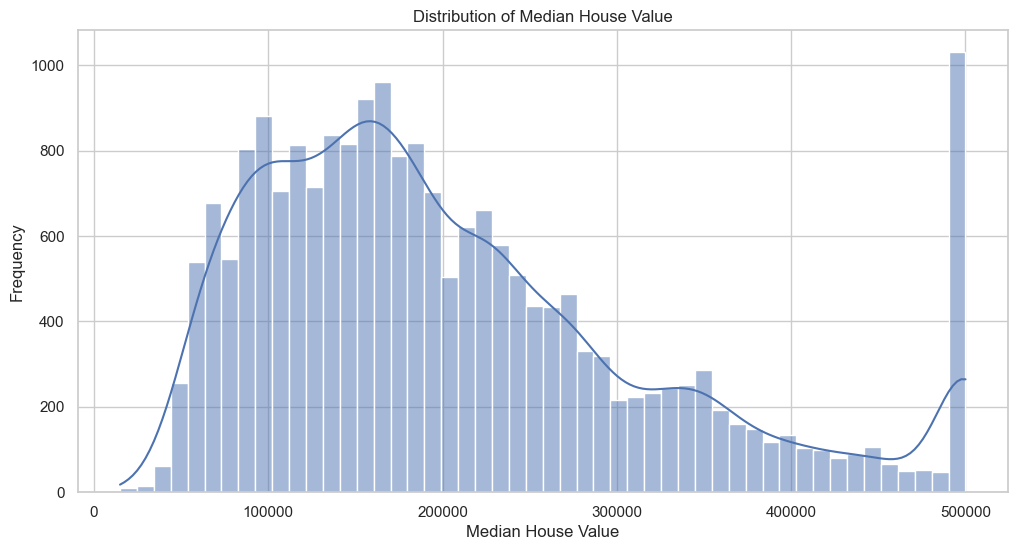

In [11]:
sns.histplot(df["median_house_value"], kde=True, bins=50)
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()

# Feature Distributions

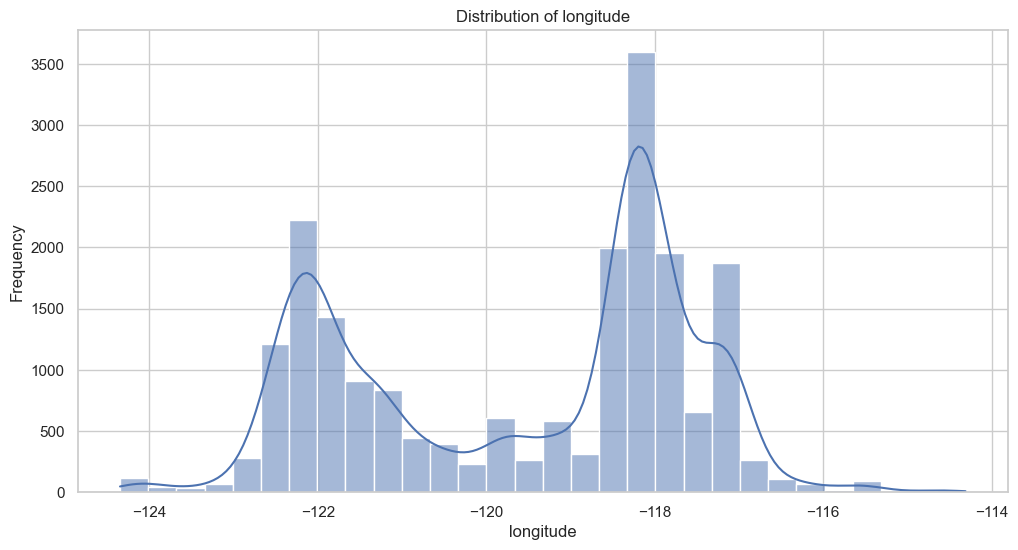

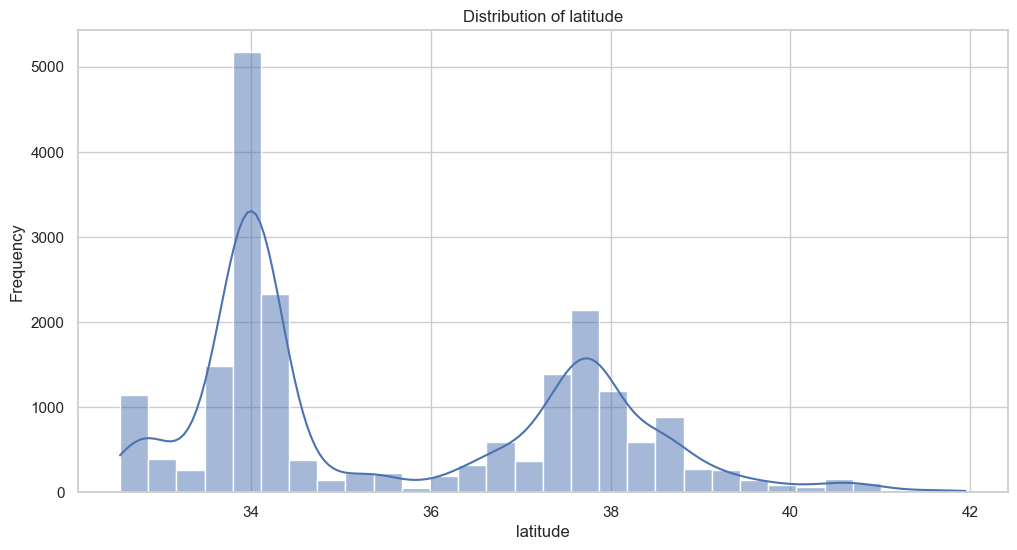

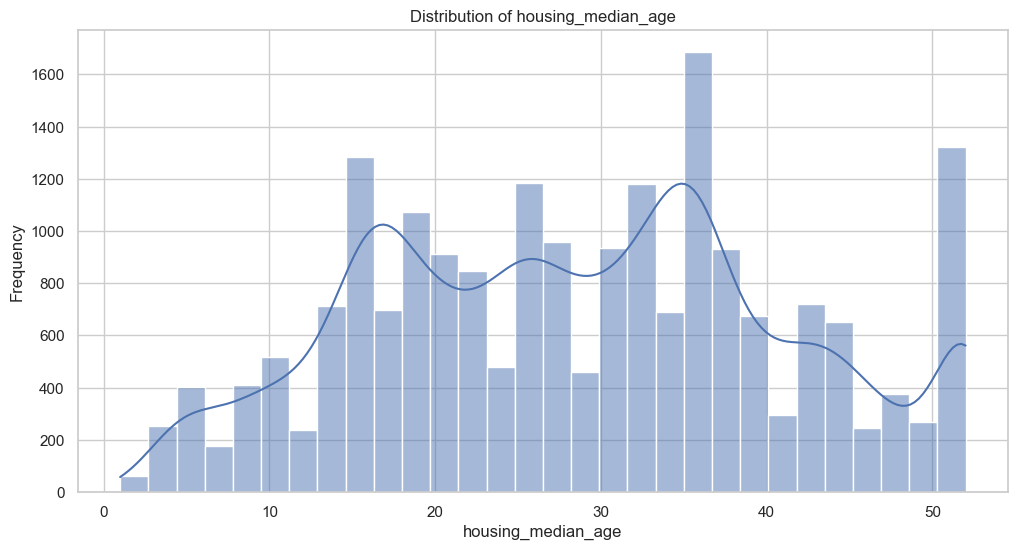

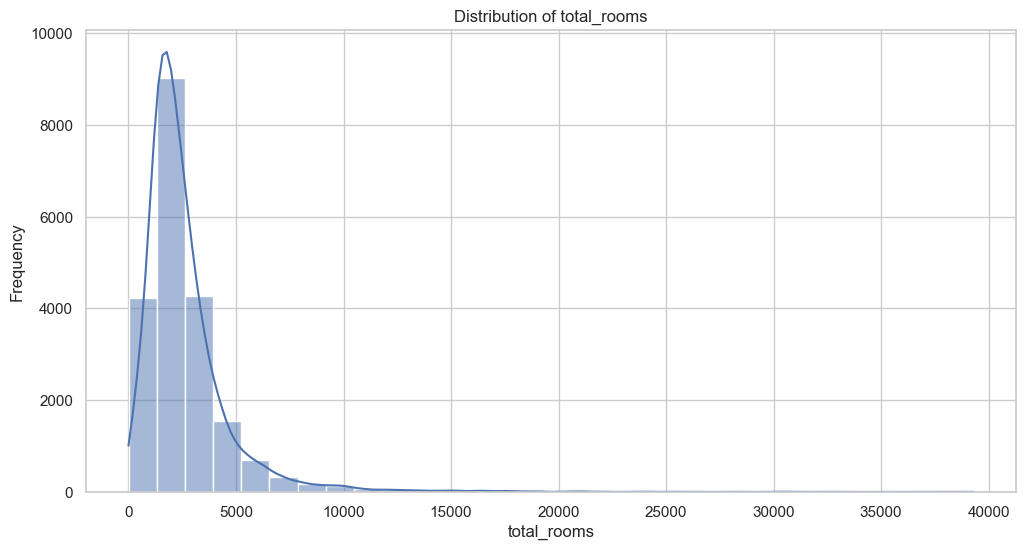

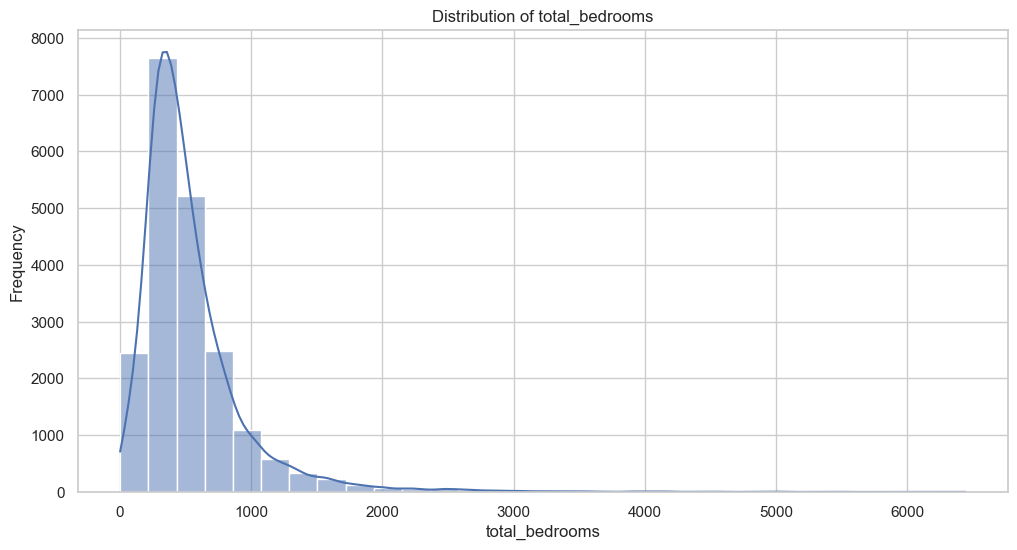

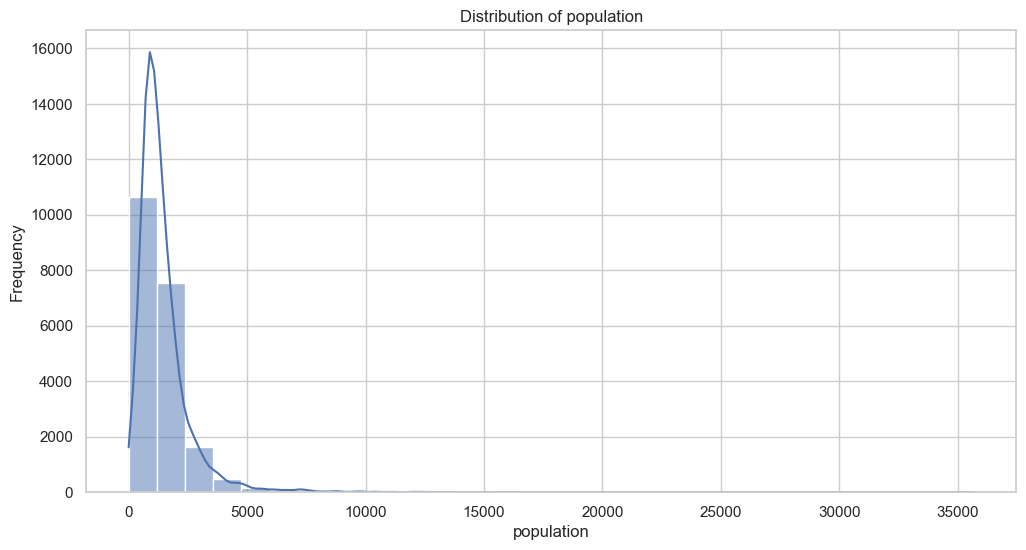

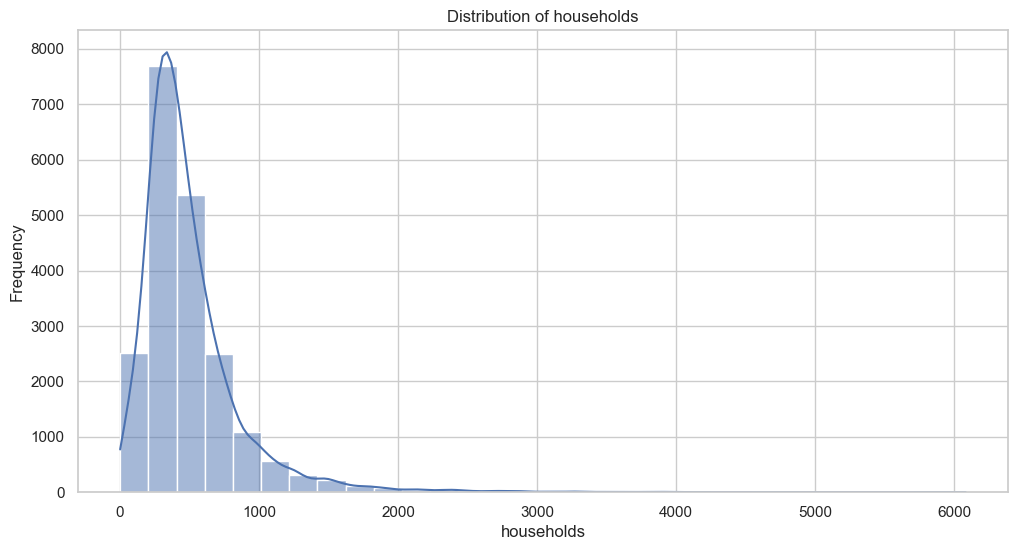

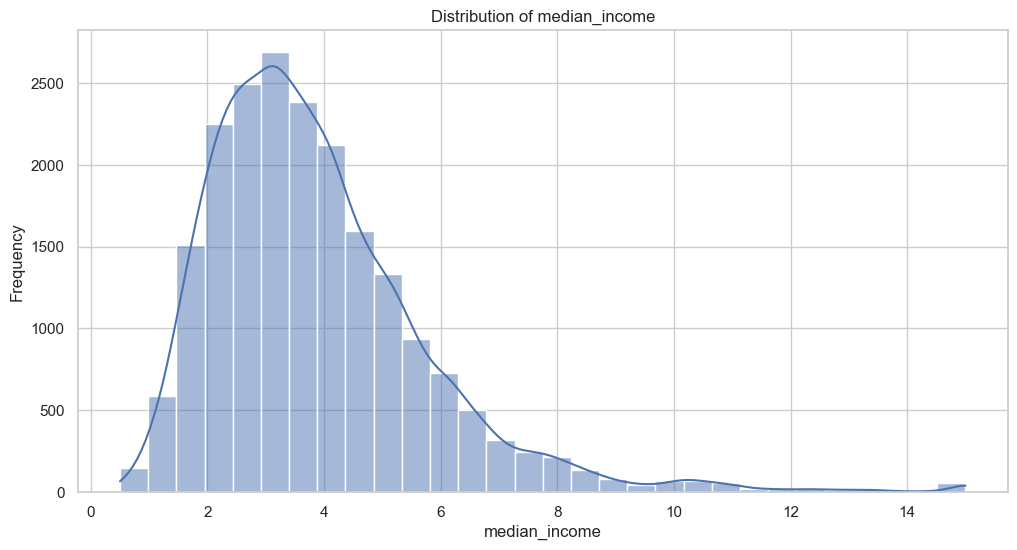

In [12]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.drop("median_house_value")
for feature in numerical_features:
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

# Feature vs Target Relationships

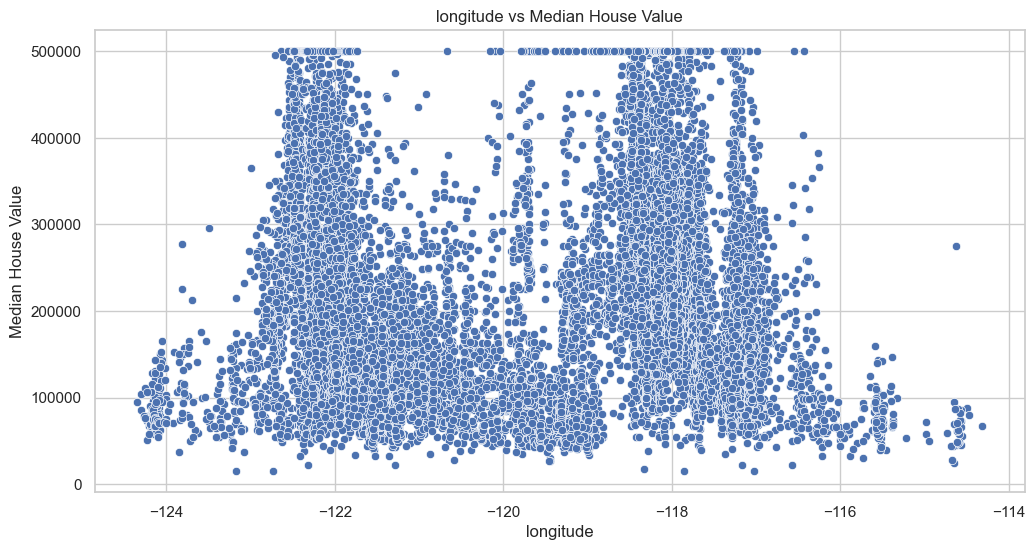

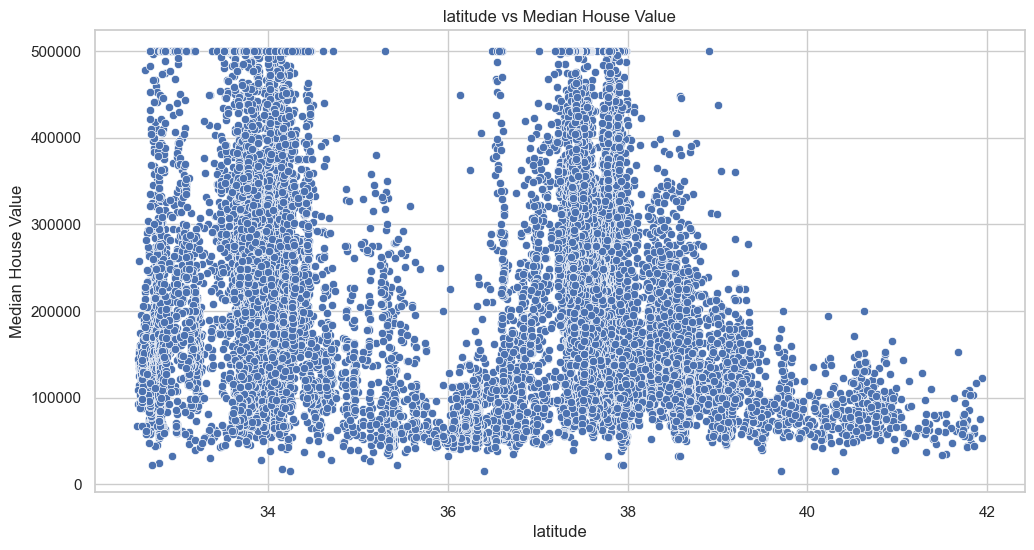

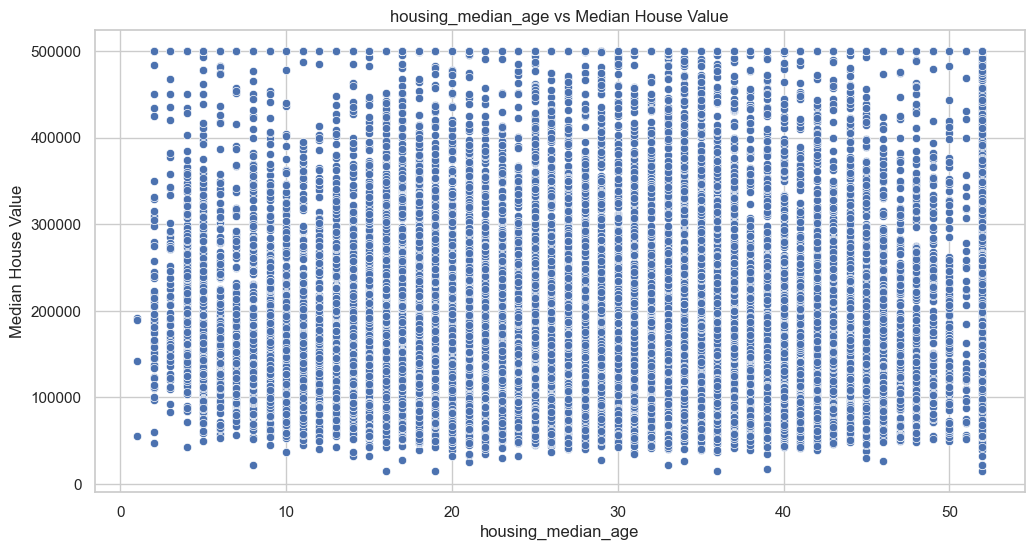

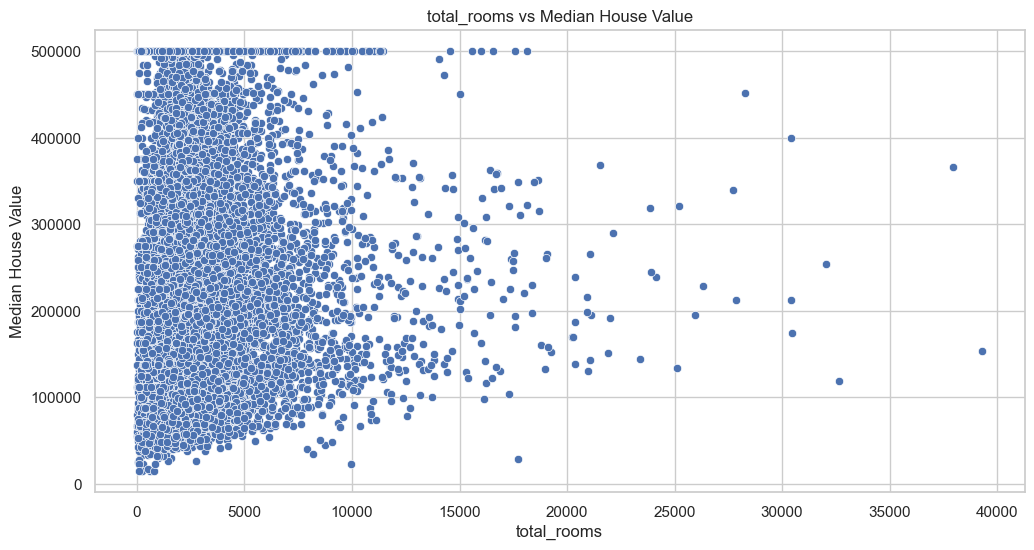

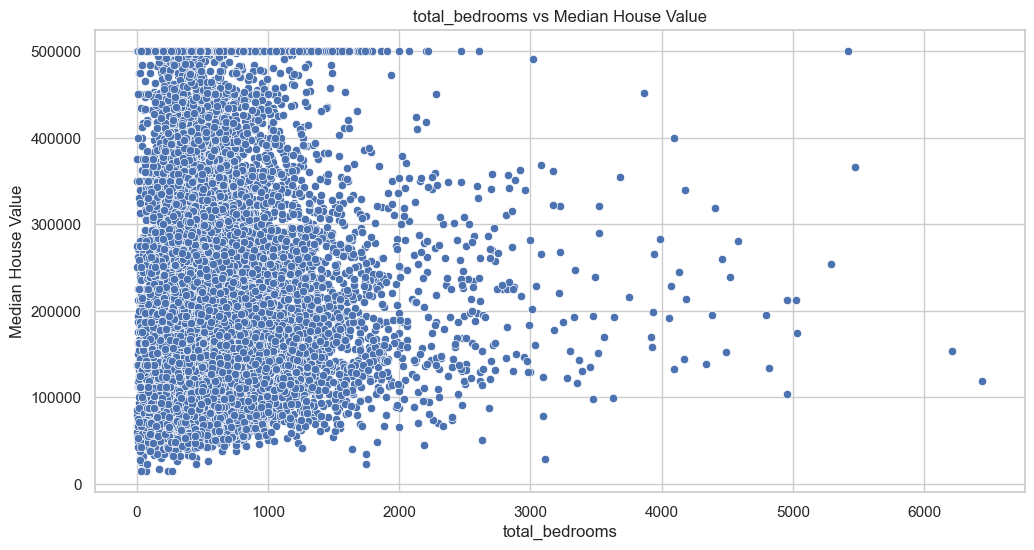

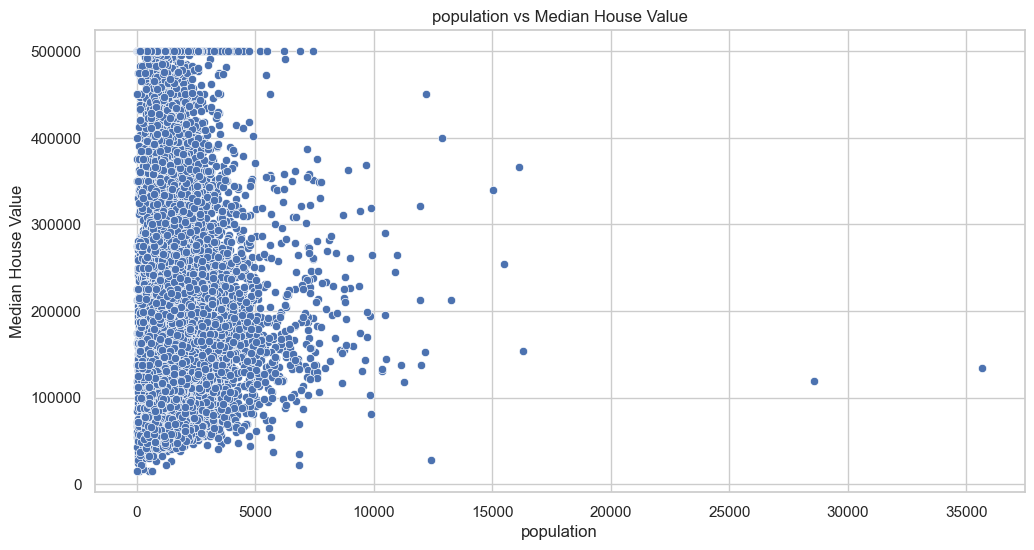

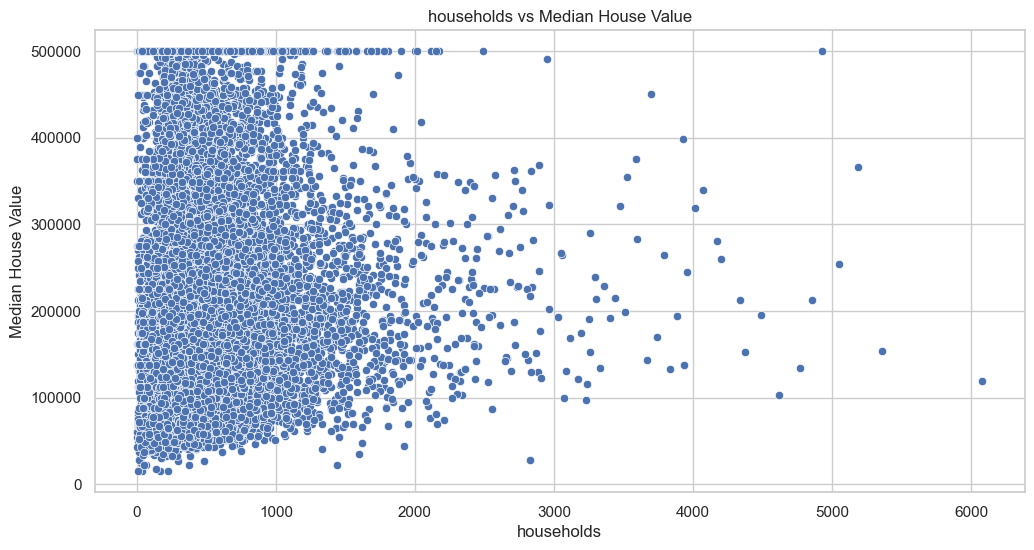

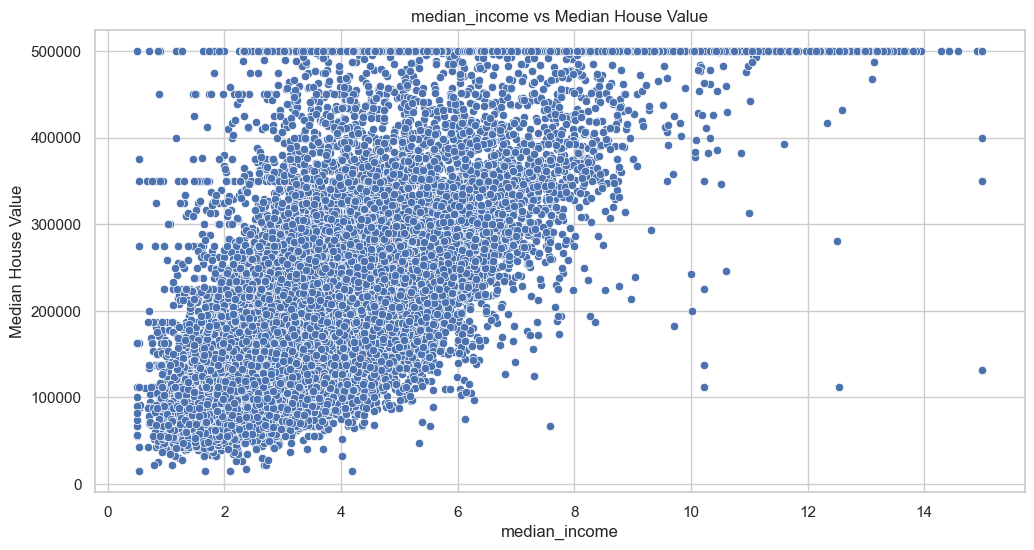

In [13]:
for feature in numerical_features:
    sns.scatterplot(x=df[feature], y=df["median_house_value"])
    plt.title(f"{feature} vs Median House Value")
    plt.xlabel(feature)
    plt.ylabel("Median House Value")
    plt.show()

# Categorical Analysis

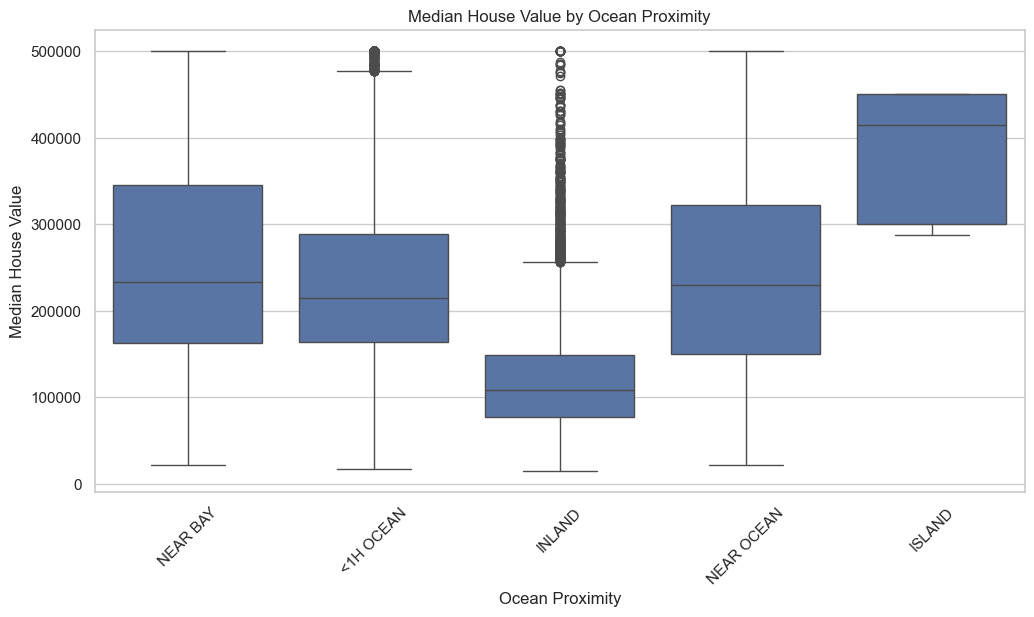

In [14]:
if "ocean_proximity" in df.columns:
    sns.boxplot(data=df, x="ocean_proximity", y="median_house_value")
    plt.title("Median House Value by Ocean Proximity")
    plt.xlabel("Ocean Proximity")
    plt.ylabel("Median House Value")
    plt.xticks(rotation=45)
    plt.show()